<a href="https://colab.research.google.com/github/hujanais/reinforcement-learning/blob/master/fizz_buzz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solving the fizzbuzz game using a neural network

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
from collections import deque
import pandas as pd

from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Activation,Dropout

Using TensorFlow backend.


In [0]:
###### Some helper utility functions.

# converts an integer into its binary representation
def dec2Bin(input, state_size):
    board = np.zeros(state_size)
    binStr = bin(input)
    binStr = binStr.replace('0b', '')
    binStr = binStr[::-1]
    k = 0
    for char in binStr:
        board[k] = 1 if char == '1' else 0
        k += 1
    
    return board

# converts int to one hot vector
def to_onehot(value,size):
    one_hot_vector = np.zeros(size)
    one_hot_vector[value] = 1
    return one_hot_vector

In [0]:
###### Describes the environment

NUMBER = 0
FIZZ = 1
BUZZ = 2
FIZZBUZZ = 3

class Environment:
    
    # the size of the state input vector.
    def __init__(self, state_size):
        self.state_size = state_size
        self.action_size = 4    # number, fizz, buzz or fizzbuzz
            
    def generateDataSet(self, numOfSamples):
        X = []
        Y = []
        for idx in range(numOfSamples):
            testValue = random.randrange(1, numOfSamples)
            X.append(dec2Bin(testValue, self.state_size))

            result = self.getClassification(testValue)
            Y.append(to_onehot(result, self.action_size))
               
        return np.array(X), np.array(Y)
    
    def getClassification(self, testValue):
        result = NUMBER
        if (testValue % 15 == 0):
            result = FIZZBUZZ
        elif (testValue % 3 == 0):
            result = FIZZ
        elif (testValue % 5 == 0):
            result = BUZZ
        else:
            result = NUMBER
                
        return result

In [0]:
# The Neural Network Agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = 0.99
        self.model = self._buildModel()
    
    def train(self, X, Y):
        return self.model.fit(X, Y, epochs=500, batch_size=128, verbose=0)
        
    def predict(self, testValue):
        state = dec2Bin(testValue, self.state_size)
        state_tensor = np.reshape(state, (1, self.state_size))

        action = agent.model.predict(state_tensor)
        return action
        
    def _buildModel(self):
        model = Sequential()
        model.add(Dense(128, input_shape=(self.state_size,), activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(env.action_size, activation='softmax'))

        model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
        
        # activation ='sigmoid' - from 0 to 1
        # activation = 'tanh' - from -1 to +1
        # activation = 'softmax' - if it's a classification problem with only one correct class
        # actication = 'softplus' - from 0 to +inf.        
                             
        return model

TrainData Size: 3481, TestData Size: 615
dict_keys(['loss', 'accuracy'])


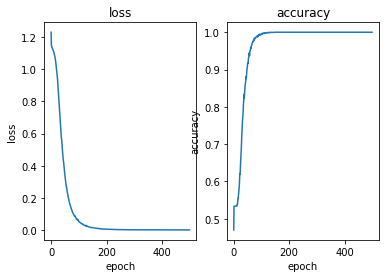

In [7]:
# Train the agent.
state_size = 12   # play up to 2^state_size numbers
env = Environment(state_size)
agent = DQNAgent(env.state_size, env.action_size)
X, Y = env.generateDataSet(2**state_size);

# break the full set of data into a training set and a testing set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
print('TrainData Size: {}, TestData Size: {}'.format(X_train.shape[0], X_test.shape[0]))

history = agent.train(X_train, Y_train)
print(history.history.keys())
figs, axs = plt.subplots(1,2)
axs[0].plot(history.history['loss'])
axs[0].set_title('loss')
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')

axs[1].plot(history.history['accuracy'])
axs[1].set_title('accuracy')
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
plt.show()

In [8]:
# Evaluate the agent with the test dataset.
result = agent.model.evaluate(X_test, Y_test)
print('Loss: {}, Accuracy: {}'.format(result[0], result[1]))

615/615 [==============================] - 0s 61us/step
Loss: 0.0931435082872527, Accuracy: 0.9772357940673828


In [9]:
# Test the agent manually.
# This is how you actually use the model for future predictions.

nCorrect = 0
nWrong = 0

count = X_test.shape[0]

for i in range(count):
    vector_x = X_test[i]
    tensor_x = np.reshape(vector_x, (1, env.state_size))
    vector_y = Y_test[i]
    
    prediction = np.argmax(agent.model.predict(tensor_x))
    expected = np.argmax(vector_y)
    
    if (prediction == expected):
        nCorrect += 1
    else:
        nWrong += 1
    
print('Correct: {}, Incorrect: {}'.format(nCorrect, nWrong))

Correct: 601, Incorrect: 14
